# Example: Calculation of  $\Delta\alpha^{(5)}(M^2_Z)$

## Load your functions

In [1]:
from adlerpy.adler_routines import Particle
from adlerpy.adler_sm import adler_charm_pert # The charm quark connected contribution to the Adler function
from adlerpy.adler_sm import adler_bottom_pert # The bottom quark connected contribution to the Adler function
from adlerpy.adler_sm import adler_light_pert # The light quark connected contribution to the Adler function
from adlerpy.adler_sm import adler_OZI_pert # The quark disconnected contribution to the Adler function
from matplotlib import pyplot as plt  # To make some plots. 
import pandas as pd  # to create tables. 
from scipy.integrate import quad # to do the integrals. 
import numpy as np
import time



## Create the particles

In [2]:
aZ=0.1185;
Mz=91.1876;
mc0=1.273;
mb0=4.18
alpha0=1/137.035999180;
nloops=5
charm=[]


#Here you define the SM particles 
up=Particle("up",x=[2.16*0.001,2,3],mudec=0.001,mpole=None,mpole_on=False)
down=Particle("down",x=[4.67*0.001,2,3],mudec=0.001,mpole=None,mpole_on=False)
strange=Particle("strange",x=[0.09203,2,3],mudec=0.001,mpole=None,mpole_on=False)
charm=Particle("charm",x=[mc0,mc0,4],mudec=2*(mc0),mpole=1.666,mpole_on=False)
bottom=Particle("bottom",x=[mb0,mb0,5],mudec=2*mb0,mpole=4.8,mpole_on=False)
top=Particle("top",x=[164,164,6],mudec=164,mpole=164,mpole_on=True) # not necessary in this case.
particle_list=[up,charm,down,strange,bottom,top] 



## Define function to be integrated 
In this case we want to integrate 
\begin{equation}
\frac{\alpha}{3\pi}\int^{M^2_Z}_{Q^2_0}\frac{D(Q)}{Q^2}dQ^2
\end{equation}

Following the paper 2308.05740 I compute the charm and bottom quarks completely in pQCD. Hence for them $Q_0=0$. For the light quarks, and the disconnected terms the cuttof is chosen to be $Q_0=2$ GeV. 

In [3]:
def integrand_charm(Q,aZ,Mz,particles,GG,qq,nloops,QED):
    return 2*alpha0/3/np.pi*(adler_charm_pert(aZ,Mz,Q=Q,particles=particle_list,mpole_on=False,cut_low_as3=1.0,nloops=nloops,GG=GG,QED=QED))/Q;

def integrand_bottom(Q,aZ,Mz,particles,GG,qq,nloops,QED):
    return 2*alpha0/3/np.pi*(adler_bottom_pert(aZ,Mz,Q=Q,particles=particle_list,mpole_on=False,cut_low_as3=1.3,nloops=nloops,GG=GG,QED=QED))/Q;

def integrand_light(Q,aZ,Mz,particles,GG,qq,nloops,QED):
    return 2*alpha0/3/np.pi*(adler_light_pert(aZ,Mz,Q=Q,particles=particle_list,nloops=nloops,GG=GG,qq=qq,QED=QED))/Q;

def integrand_disconnected(Q,aZ,Mz,particles,GG,qq,nloops,QED):
    return 2*alpha0/3/np.pi*(adler_OZI_pert(aZ,Mz,Q,particles,nloops=nloops,QED=QED,GG=GG,qq=qq))/Q;


## Compute the Charm contribution

In [4]:
GG=0.00;
qq=0;
nloops=5
QED=True
a=aZ/np.pi

Integrals=[]
Intervals=[0,0.5,1,2*mc0*0.7,2*mc0*1.3,8,9,12,15,Mz];

start = time.time()
end=start
for i in range(len(Intervals)-1):
    Integrals.append(quad(integrand_charm, 
                          Intervals[i],
                          Intervals[i+1],args=(aZ,Mz,particle_list,GG,qq,nloops,QED))[0])
    end0=end;
    end = time.time()
    print("[",Intervals[i],",",Intervals[i+1],"]= ",Integrals[i]*10000, round(end - end0,2), "s")
print("Total time=",round(end-start,2),"s")
changecharm=1/137.036/np.pi*(4.203720393056578*a**2 + 17.148364322869213*a**3)
dacharm=sum(Integrals)+changecharm;
print((dacharm)*10000)


[ 0 , 0.5 ]=  0.418199713283314 0.21 s
[ 0.5 , 1 ]=  1.1757616784453502 0.15 s
[ 1 , 1.7821999999999998 ]=  2.902897963941941 2.37 s
[ 1.7821999999999998 , 3.3098 ]=  6.790448304625509 4.01 s
[ 3.3098 , 8 ]=  16.001703272831765 1.37 s
[ 8 , 9 ]=  2.4287749857802687 1.46 s
[ 9 , 12 ]=  6.050394269093238 0.12 s
[ 12 , 15 ]=  4.7624445165518186 0.11 s
[ 15 , 91.1876 ]=  38.86422215574841 0.11 s
Total time= 9.93 s
79.55515056781147


In [5]:
#The perturbative error is taken to be dommminated by the interpolated region in the region between [2mc0*0.7,2*mc*1.3]. I take it to be the difference between the 
#alphas^2 and alphas^1 contributions. The result is
6.918785860212447-6.788331061274221

0.1304547989382261

## Compute the Bottom contribution

In [6]:
GG=0.00;
qq=0;
nloops=5
QED=True
a=aZ/np.pi

Integrals=[]
Intervals=[0.001,0.5,1,2*mb0*0.7,2*mb0*1.3,15,20,30,Mz];
mb=bottom.mrun(aZ=aZ,Mz=Mz,mu=Mz,particles=particle_list)
changebottom=1/137.036/np.pi*(-4*mb**2/3/Mz**2+1.0509300982641445*a**2 + 4.287091080717303*a**3)

start = time.time()
end=start
for i in range(len(Intervals)-1):
    Integrals.append(quad(integrand_bottom, 
                          Intervals[i],
                          Intervals[i+1],args=(aZ,Mz,particle_list,GG,qq,nloops,QED))[0])
    end0=end;
    end = time.time()
    print("[",Intervals[i],",",Intervals[i+1],"]= ",Integrals[i]*10000, round(end - end0,2), "s")
print("Total time=",round(end-start,2),"s")
dabottom=sum(Integrals)+changebottom;
(dabottom)*10000

[ 0.001 , 0.5 ]=  0.008730297036625433 0.22 s
[ 0.5 , 1 ]=  0.026028753973210497 0.23 s
[ 1 , 5.851999999999999 ]=  0.9631993034865562 1.27 s
[ 5.851999999999999 , 10.868 ]=  1.5340589485824758 5.46 s
[ 10.868 , 15 ]=  1.201897753537221 0.13 s
[ 15 , 20 ]=  1.2566561996892338 0.12 s
[ 20 , 30 ]=  1.9634188711721754 0.13 s
[ 30 , 91.1876 ]=  5.824362165864191 1.28 s
Total time= 8.84 s


12.788071079002904

In [7]:
GG=0.00;
qq=0.00;
nloops=5
QED=True
a=aZ/np.pi

Integrals=[]
Intervals=[2,9,12,15,Mz];
changelight=1/137.036/np.pi*(6.305580589584867*a**2 + 25.72254648430382*a**3)

start = time.time()
end=start
for i in range(len(Intervals)-1):
    Integrals.append(quad(integrand_light, 
                          Intervals[i],
                          Intervals[i+1],args=(aZ,Mz,particle_list,GG,qq,nloops,QED))[0])
    end0=end;
    end = time.time()
    print("[",Intervals[i],",",Intervals[i+1],"]= ", round(end - end0,2), "s")
print("Total time=",round(end-start,2),"s")
dalight=sum(Integrals)+changelight
(dalight)*10000

[ 2 , 9 ]=  3.44 s
[ 9 , 12 ]=  0.09 s
[ 12 , 15 ]=  0.08 s
[ 15 , 91.1876 ]=  0.08 s
Total time= 3.69 s


126.03396304974557

In [8]:
GG=0;
qq=0;
nloops=5
QED=True
a=aZ/np.pi

Integrals=[]
Intervals=[2,9,12,15,Mz];
changelight=1/137.036/np.pi*(6.305580589584867*a**2 + 25.72254648430382*a**3)

start = time.time()
end=start
for i in range(len(Intervals)-1):
    Integrals.append(quad(integrand_disconnected, 
                          Intervals[i],
                          Intervals[i+1],args=(aZ,Mz,particle_list,GG,qq,nloops,QED))[0])
    end0=end;
    end = time.time()
    print("[",Intervals[i],",",Intervals[i+1],"]= ", round(end - end0,2), "s")
print("Total time=",round(end-start,2),"s")
dasiconnected=sum(Integrals)
(dasiconnected)*10000 

[ 2 , 9 ]=  0.05 s
[ 9 , 12 ]=  0.0 s
[ 12 , 15 ]=  0.0 s
[ 15 , 91.1876 ]=  0.0 s
Total time= 0.06 s


-0.024271480484553867

In [9]:
def adlertot(aZ,Mz,Q,particles,nloops,GG,qq):
    adlight=adler_light_pert(aZ=aZ,Mz=Mz,Q=Q,particles=particles,nloops=nloops,GG=GG,qq=qq,QED=True)
    adc=adler_charm_pert(aZ=aZ,Mz=Mz,Q=Q,particles=particles,mpole_on=False,nloops=nloops,GG=GG,QED=True)
    adb=adler_bottom_pert(aZ=aZ,Mz=Mz,Q=Q,particles=particles,mpole_on=False,nloops=nloops,GG=GG,QED=True)
    adozi=adler_OZI_pert(aZ,Mz,Q,particles,nloops=nloops,QED=QED,GG=GG,qq=qq)
    return adlight+adc+adb+adozi

q_list = np.arange(1.2,90,0.05)
adlist=[adlertot(aZ=aZ,Mz=Mz,Q=q,particles=particle_list,nloops=5,GG=0,qq=0) for q in q_list];



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


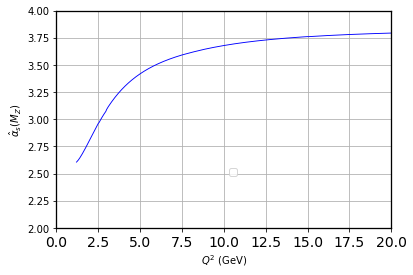

In [10]:
fig, ax = plt.subplots()
#plt.plot(qplot,aslat,color="blue",linewidth=0.8)
plt.plot(q_list,adlist,color="blue",linewidth=0.9)
plt.grid()
plt.xticks(fontsize=14)
ax.spines['bottom'].set_linewidth(1.3)
ax.spines['left'].set_linewidth(1.3)
ax.spines['top'].set_linewidth(1.3)
ax.spines['right'].set_linewidth(1.3)
ax.set(xlabel='$Q^2$ (GeV)', ylabel='$\hat{\\alpha}_s(M_Z)$')
ax.set_xlim([0,20])
ax.set_ylim([2,4])
plt.show()